In [41]:
# importing pandas module
import pandas as pd

# importing dataset
data = pd.read_csv('bank-full.csv', sep=';')

# heading
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [42]:
# printing info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [43]:
# importing the module
from sklearn import preprocessing
  
# creating labing encoding object
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in multiple columns
data['job']= label_encoder.fit_transform(data['job'])
data['marital']= label_encoder.fit_transform(data['marital'])
data['education']= label_encoder.fit_transform(data['education'])
data['default']= label_encoder.fit_transform(data['default'])
data['housing']= label_encoder.fit_transform(data['housing'])
data['housing']= label_encoder.fit_transform(data['housing'])
data['loan']= label_encoder.fit_transform(data['loan'])
data['contact']= label_encoder.fit_transform(data['contact'])
data['month']= label_encoder.fit_transform(data['month'])
data['poutcome']= label_encoder.fit_transform(data['poutcome'])
data['y']= label_encoder.fit_transform(data['y'])


In [44]:
data.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

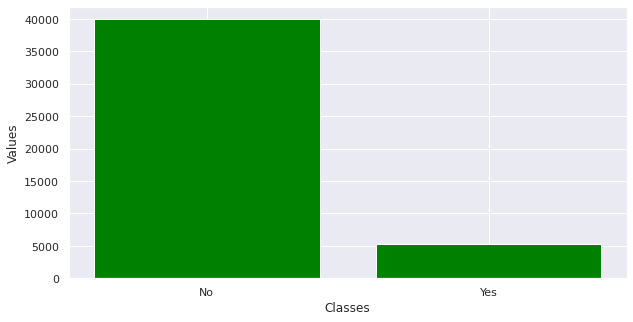

In [45]:
# importing matplotlib
import matplotlib.pyplot as plt

# plotting
fig = plt.figure(figsize = (10, 5))

#  Bar plot
plt.bar(['No',"Yes"], data.y.value_counts(), color ='green',
        width = 0.8)

# labeling
plt.xlabel("Classes")
plt.ylabel("Values")
plt.show()

In [46]:
# splitting dataset
X = data.drop('y', axis=1)
y = data['y']

In [51]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [52]:
# importing required module
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Sequential

# define model
model = Sequential()

# adding input layer with 16 nodes
model.add(InputLayer(16))

# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

# adding output layer 
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=50)


# evaluate the model
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

Epoch 1/50
989/989 [==============================] - 4s 2ms/step - loss: 13.9015 - accuracy: 0.7997
Epoch 2/50
989/989 [==============================] - 2s 2ms/step - loss: 1.5327 - accuracy: 0.8318
Epoch 3/50
989/989 [==============================] - 2s 2ms/step - loss: 1.0903 - accuracy: 0.8470
Epoch 4/50
989/989 [==============================] - 2s 2ms/step - loss: 0.8574 - accuracy: 0.8559
Epoch 5/50
989/989 [==============================] - 2s 2ms/step - loss: 0.9070 - accuracy: 0.8597
Epoch 6/50
989/989 [==============================] - 2s 2ms/step - loss: 0.8663 - accuracy: 0.8593
Epoch 7/50
989/989 [==============================] - 2s 2ms/step - loss: 0.8899 - accuracy: 0.8604
Epoch 8/50
989/989 [==============================] - 2s 2ms/step - loss: 0.8771 - accuracy: 0.8622
Epoch 9/50
989/989 [==============================] - 2s 2ms/step - loss: 0.7033 - accuracy: 0.8684
Epoch 10/50
989/989 [==============================] - 2s 2ms/step - loss: 0.7130 - accuracy: 0.866

In [53]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=50)



Epoch 1/50
989/989 [==============================] - 2s 2ms/step - loss: 0.6889 - accuracy: 0.8684
Epoch 2/50
989/989 [==============================] - 2s 2ms/step - loss: 0.5657 - accuracy: 0.8740
Epoch 3/50
989/989 [==============================] - 2s 2ms/step - loss: 0.5800 - accuracy: 0.8738
Epoch 4/50
989/989 [==============================] - 2s 2ms/step - loss: 0.5565 - accuracy: 0.8749
Epoch 5/50
989/989 [==============================] - 2s 2ms/step - loss: 0.6025 - accuracy: 0.8726
Epoch 6/50
989/989 [==============================] - 2s 2ms/step - loss: 0.6995 - accuracy: 0.8703
Epoch 7/50
989/989 [==============================] - 2s 2ms/step - loss: 0.4866 - accuracy: 0.8762
Epoch 8/50
989/989 [==============================] - 2s 2ms/step - loss: 0.7650 - accuracy: 0.8657
Epoch 9/50
989/989 [==============================] - 2s 2ms/step - loss: 0.6920 - accuracy: 0.8707
Epoch 10/50
989/989 [==============================] - 2s 2ms/step - loss: 0.5580 - accuracy: 0.8743

In [54]:
# evaluate the model
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

424/424 [==============================] - 1s 2ms/step - loss: 0.7659 - accuracy: 0.8743
Test Accuracy: 0.8742996454238892


In [55]:
# importing the module
from tensorflow import keras


# function to create model
def Model_builder(hp):
    
#     initializaing the model
    model = keras.Sequential()
    model.add(InputLayer(16))

#     specifying the maximum and minimum nodes
    hp_units = hp.Int('units', min_value=5, max_value=100)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

#     comppiling the model
    model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

    return model

In [56]:
# importing the module
import keras_tuner as kt
import tensorflow as tf

# calling the function using hyperband 
tuner = kt.Hyperband(Model_builder,
                     objective='val_accuracy',
                     max_epochs=100)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [57]:
# early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


In [58]:
# initializing the tunner
tuner.search(X,y, epochs=100, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print("Optimin number of nodes in hidden layer are :", best_hps.get('units'))

INFO:tensorflow:Oracle triggered exit
Optimin number of nodes in hidden layer are : 54


In [59]:
# creating model with optimimum parameters
model = tuner.hypermodel.build(best_hps)

# training the model
history = model.fit(X, y, epochs=200, validation_split=0.2)

# fining the optimum epochs
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch value is: ' ,best_epoch)

Epoch 1/200
1131/1131 [==============================] - 4s 3ms/step - loss: 1.3156 - accuracy: 0.9075 - val_loss: 1.6133 - val_accuracy: 0.7113
Epoch 2/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.7266 - accuracy: 0.9143 - val_loss: 16.1520 - val_accuracy: 0.6864
Epoch 3/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.7410 - accuracy: 0.9154 - val_loss: 3.9888 - val_accuracy: 0.6935
Epoch 4/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.6528 - accuracy: 0.9155 - val_loss: 1.8853 - val_accuracy: 0.6935
Epoch 5/200
1131/1131 [==============================] - 3s 2ms/step - loss: 0.7863 - accuracy: 0.9143 - val_loss: 3.8879 - val_accuracy: 0.6849
Epoch 6/200
1131/1131 [==============================] - 3s 2ms/step - loss: 0.6368 - accuracy: 0.9169 - val_loss: 4.1472 - val_accuracy: 0.7007
Epoch 7/200
1131/1131 [==============================] - 3s 2ms/step - loss: 0.6570 - accuracy: 0.9145 - val_loss: 2.6783 - val_a

1131/1131 [==============================] - 2s 2ms/step - loss: 0.1732 - accuracy: 0.9365 - val_loss: 0.9056 - val_accuracy: 0.6888
Epoch 58/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1712 - accuracy: 0.9358 - val_loss: 0.9327 - val_accuracy: 0.6896
Epoch 59/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1695 - accuracy: 0.9365 - val_loss: 0.8997 - val_accuracy: 0.6873
Epoch 60/200
1131/1131 [==============================] - 3s 2ms/step - loss: 0.1705 - accuracy: 0.9363 - val_loss: 0.8654 - val_accuracy: 0.6956
Epoch 61/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1692 - accuracy: 0.9359 - val_loss: 0.8405 - val_accuracy: 0.6866
Epoch 62/200
1131/1131 [==============================] - 3s 2ms/step - loss: 0.1672 - accuracy: 0.9366 - val_loss: 0.9634 - val_accuracy: 0.6883
Epoch 63/200
1131/1131 [==============================] - 3s 2ms/step - loss: 0.1694 - accuracy: 0.9363 - val_loss: 0.9053 - val_accuracy

1131/1131 [==============================] - 3s 2ms/step - loss: 0.1658 - accuracy: 0.9369 - val_loss: 0.9072 - val_accuracy: 0.6966
Epoch 114/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1635 - accuracy: 0.9367 - val_loss: 0.9058 - val_accuracy: 0.6885
Epoch 115/200
1131/1131 [==============================] - 3s 2ms/step - loss: 0.1653 - accuracy: 0.9368 - val_loss: 0.9118 - val_accuracy: 0.6873
Epoch 116/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1642 - accuracy: 0.9371 - val_loss: 0.9305 - val_accuracy: 0.6867
Epoch 117/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1631 - accuracy: 0.9364 - val_loss: 0.9526 - val_accuracy: 0.6888
Epoch 118/200
1131/1131 [==============================] - 3s 2ms/step - loss: 0.1688 - accuracy: 0.9369 - val_loss: 0.9146 - val_accuracy: 0.6883
Epoch 119/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1640 - accuracy: 0.9374 - val_loss: 0.9991 - val_ac

Epoch 169/200
1131/1131 [==============================] - 3s 2ms/step - loss: 0.1604 - accuracy: 0.9388 - val_loss: 0.9212 - val_accuracy: 0.6903
Epoch 170/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1619 - accuracy: 0.9380 - val_loss: 0.8374 - val_accuracy: 0.6898
Epoch 171/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1606 - accuracy: 0.9384 - val_loss: 0.8397 - val_accuracy: 0.6924
Epoch 172/200
1131/1131 [==============================] - 3s 2ms/step - loss: 0.1612 - accuracy: 0.9372 - val_loss: 0.9077 - val_accuracy: 0.6861
Epoch 173/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1609 - accuracy: 0.9379 - val_loss: 0.8290 - val_accuracy: 0.6917
Epoch 174/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1603 - accuracy: 0.9386 - val_loss: 0.8443 - val_accuracy: 0.6876
Epoch 175/200
1131/1131 [==============================] - 2s 2ms/step - loss: 0.1605 - accuracy: 0.9378 - val_loss: 0

In [120]:
# importing required module
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Sequential

# define model
model = Sequential()

# adding input layer with 16 nodes
model.add(InputLayer(16))

# adding hidden layer with 10 nodes
model.add(Dense(38, activation='relu', kernel_initializer='he_normal'))

# adding output layer 
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=70)


# evaluate the model
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

Epoch 1/70
989/989 [==============================] - 2s 2ms/step - loss: 6.9577 - accuracy: 0.8279
Epoch 2/70
989/989 [==============================] - 2s 2ms/step - loss: 1.5229 - accuracy: 0.8441
Epoch 3/70
989/989 [==============================] - 2s 2ms/step - loss: 1.2878 - accuracy: 0.8495
Epoch 4/70
989/989 [==============================] - 2s 2ms/step - loss: 1.2284 - accuracy: 0.8523
Epoch 5/70
989/989 [==============================] - 2s 2ms/step - loss: 1.3973 - accuracy: 0.8549
Epoch 6/70
989/989 [==============================] - 2s 2ms/step - loss: 1.4584 - accuracy: 0.8521
Epoch 7/70
989/989 [==============================] - 2s 2ms/step - loss: 1.4538 - accuracy: 0.8543
Epoch 8/70
989/989 [==============================] - 2s 2ms/step - loss: 1.6830 - accuracy: 0.8524
Epoch 9/70
989/989 [==============================] - 2s 2ms/step - loss: 1.3439 - accuracy: 0.8546
Epoch 10/70
989/989 [==============================] - 2s 2ms/step - loss: 1.4361 - accuracy: 0.8570

In [2]:
import pandas as pd

In [16]:
# importing the dataset
dataset = pd.read_csv('dataset.csv', sep=";")

# heading of dataset
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [18]:
# importing the module
from sklearn import preprocessing
  
# creating labing encoding object
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in multiple columns
dataset['Target']= label_encoder.fit_transform(dataset['Target'])

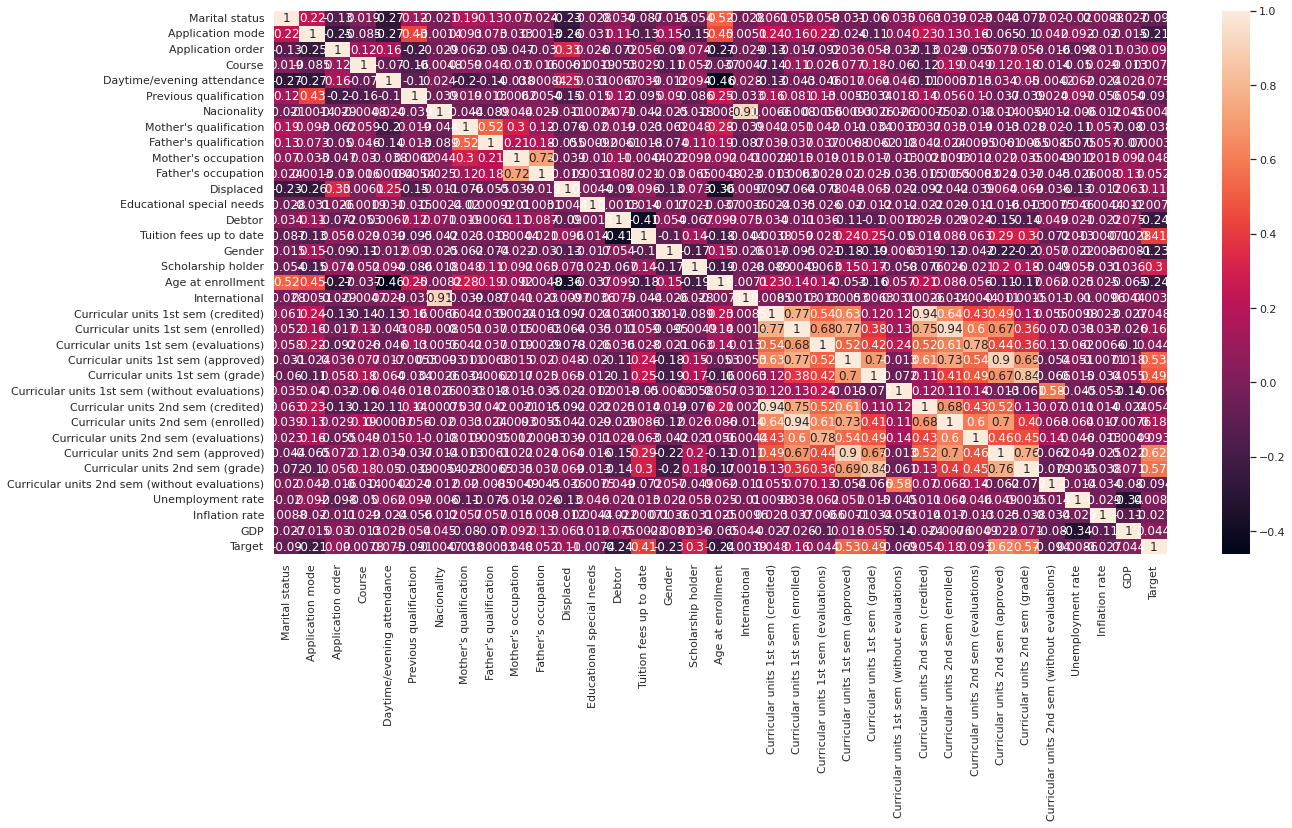

In [23]:
# importing dataset
import matplotlib.pyplot as plt
import seaborn as sn


# finding the correlation
corrMatrix = dataset.corr()

# setting size
sn.set(rc = {'figure.figsize':(20,10)})

# plotting the graph
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [24]:
# dividing the dataset
X = dataset.drop('Target', axis=1)
y=dataset['Target']

In [27]:
# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [28]:
# importing required module
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Sequential

# define model
model = Sequential()

# adding input layer with 16 nodes
model.add(InputLayer(16))

# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

# adding output layer 
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=50)


# evaluate the model
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

2022-06-09 23:36:48.510173: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 23:36:48.510262: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [34]:
# define model
model = Sequential()

# adding input layer with 16 nodes
model.add(InputLayer(34))

# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

# adding output layer 
model.add(Dense(3, activation='softmax'))


In [35]:
import tensorflow as tf

In [36]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
97/97 [==============================] - 2s 3ms/step - loss: 1.6904 - accuracy: 0.4018
Epoch 2/50
97/97 [==============================] - 0s 4ms/step - loss: 0.9842 - accuracy: 0.5827
Epoch 3/50
97/97 [==============================] - 0s 2ms/step - loss: 0.8362 - accuracy: 0.6444
Epoch 4/50
97/97 [==============================] - 0s 2ms/step - loss: 0.7707 - accuracy: 0.6799
Epoch 5/50
97/97 [==============================] - 0s 2ms/step - loss: 0.7375 - accuracy: 0.6951
Epoch 6/50
97/97 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.7061
Epoch 7/50
97/97 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.7164
Epoch 8/50
97/97 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.7196
Epoch 9/50
97/97 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.7306
Epoch 10/50
97/97 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7358
Epoch 11/50
97/97 [

In [37]:
# evaluate the model
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

42/42 [==============================] - 1s 2ms/step - loss: 0.5770 - accuracy: 0.7613
Test Accuracy: 0.7612951993942261
